In [1]:
%load_ext autoreload
%autoreload 2

In [63]:
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [67]:
colors = ["#7e1e9c", "#75bbfd", "#dbb40c", "#fd3c06"]

# Epidemie e il loro tasso di riproduzione

In epidemiologia, il *[tasso netto di riproduzione](https://it.wikipedia.org/wiki/Tasso_netto_di_riproduzione)* di un'infezione, indicato con $R_{0}$, indica il numero di nuovi casi generati in media da un singolo caso durante il proprio periodo infettivo, in una popolazione che altrimenti non sarebbe infetta.

Questa misura è utile per determinare la possibilità di propagazione di un'infezione all'interno di una popolazione.

Se $R_{0}$ < 1 l'infezione sul lungo termine si estinguerà, mentre se $R_{0}$ > 1 l'infezione potrà diffondersi nella popolazione.

### Il covid-19 e il suo tasso netto di riproduzione

Nel caso del covid-19, possiamo assumere che (quasi) tutta la popolazione mondiale sia suscettibile, visto che si tratta di un virus nuovo.
    
Ad oggi, si pensa che il tasso $R_{0}$ per il covid-19 sia intorno a 3.5($): questo significa che ogni persona infetta trasmetterà il virus ad altre 3.5 persone, **in media**, nell'arco del proprio tempo infettivo.

($) [articolo](https://doi.org/10.1016/S2214-109X%2820%2930074-7) (in Inglese); valori riportati tra 1.4 e 3.9; fare riferimento alla [pagina Wikipedia](https://en.wikipedia.org/wiki/Basic_reproduction_number) (in Inglese) per la completa (al momento) letteratura scientifica.

## Modello 1: modello epidemiologico SIR

Il [modello epidemiologico SIR](https://en.wikipedia.org/wiki/Compartmental_models_in_epidemiology#The_SIR_model) suddivide la popolazione in 3 categorie:

- S: soggetti suscettibili ma non ancora infetti (individui sani passibili di contagio)
- I: soggetti infetti (in grado di trasmettere il contagio)
- R: soggetti rimossi (guariti o morti)

Il modell SIR si serve di due parametri per descrivere l'evoluzione di un'epidemia: β (beta) e γ (gamma).

**β** descrive il tasso di infezione: un soggetto infetto viene a contatto con altri βN soggetti in una unità di tempo (ad esempio un giorno), e di questi βN soggetti, S/N saranno suscettibili al contagio (si possono cioè ammalare).

**γ** invece è il tasso medio di guarigione: 1/γ è l'arco di tempo medio durante il quale un soggetto infetto può contagiare altri soggetti.

Il modello SIR è descritto dalle seguenti equazioni differenziali:

1. dS/dt = -βSI / N
2. dI/dt = βSI / N - γI
3. dR/dt = γI

Da notare che in questo modello non si assumono altri eventi demografici (nascite, morti), la popolazione è cioè definita chiusa.

Da notare, ancora, l'assenza di misure profilattiche quali quarantine, riduzione del contatto tra soggetti suscettibili, o una campagna di vaccinazioni.

Andiamo a vedere le curve epidemiologiche dei soggetti S, I ed R, e il loro andamento nel tempo.

In [3]:
import sys
sys.path.append('../')

In [4]:
import modelli as md
import numpy as np

In [69]:
# supponiamo di avere una popolazione totale di 10k persone
N = 10000
# suppuniamo inoltre che il numero iniziale di contagiati sia 1
I0 = 1
# il numero iniziale di rimossi è zero
R0 = 0
# i soggetti a rischio di infezione
S0 = N - I0 - R0

In [70]:
# beta: tasso di infezione
beta = 0.6
# gamma: tasso medio di guarigione
gamma = 1./6

R0 = beta / gamma
print(f'R0 = {R0}')
# arco di tempo in giorni
t = np.linspace(0, 150, 150)

R0 = 3.6


In [71]:
y0 = S0, I0, R0
S, I, R = md.resolve_SIR(y0, t, N, beta, gamma)

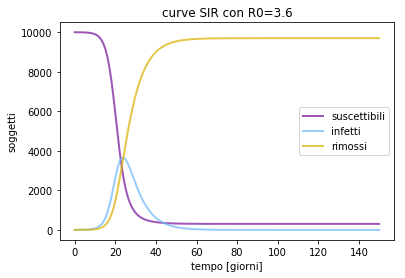

In [73]:
plt.plot(t, S, colors[0], alpha=0.75, lw=2, label='suscettibili')
plt.plot(t, I, colors[1], alpha=0.75, lw=2, label='infetti')
plt.plot(t, R, colors[2], alpha=0.75, lw=2, label='rimossi')
plt.xlabel('tempo [giorni]')
plt.ylabel('soggetti')
plt.legend()
plt.title(f'curve SIR con R0={R0}');

**Come si legge questo grafico?**

Questo grafico illustra l'andamento nel tempo delle tre categorie di persone previste dal modello.

In particolare, il modello "prevede" un picco di contagiati intorno al ventesimo giorno dall'inizio dell'epidemia, con un numero di infetti intorno a 4000 (3653, per essere precisi).

Nel modello SIR, dopo essersi ammmalato, un soggetto può guarire o morire; inoltre, se guarito, il soggetto non può essere nuovamente contagiato (diventa, cioè immune).

Col passare del tempo è naturale che il numero di soggetti suscettibili diminuisca; il tasso di crescita di un'epidemia **in corso** si chiama **tasso di riproduzione effettivo**, $R_{e}$.

Quando $R_{e}$ < 1, l'epidemia smette di diffondersi.

Tutto quello che abbiamo detto fino ad ora presuppone una _popolazione chiusa_; nel mondo reale, ovviamente, non funziona così: la gente si muove e un soggetto infetto potrebbe lasciare il nostro gruppo di 4000 persone e trasmettere il virus ad un'altra popolazione in un'altra città, un altro Paese...). 

Un virus che tutti conosciamo è quello che causa il **morbillo**, una malattia altamente contagiosa, per la quale $R_{0}$ è stato estimato in un intervallo di valori tra 12 e 18: dato che ciascuna persona infetta può trasmettere il virus fino a 18 persone (in media), è facile immaginare come il virus infetti tutta la popolazione in un arco di tempo parecchio ristretto.

Vediamo come sono le curve SIR per un'epidemia come quella del morbillo.

In [74]:
# supponiamo di avere una popolazione totale di 10k persone
N = 10000
# suppuniamo inoltre che il numero iniziale di contagiati sia 1
I0 = 1
# il numero iniziale di rimossi è zero
R0 = 0
# i soggetti a rischio di infezione
S0 = N - I0 - R0
beta = 1.8
gamma = 1./10
R0 = beta / gamma
print(f'R0 = {R0}')
# una grid di punti (in giorni)
t = np.linspace(0, 60, 60)

R0 = 18.0


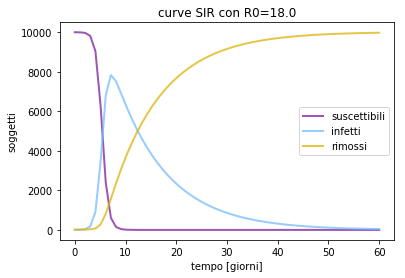

In [75]:
y0 = S0, I0, R0
S, I, R = md.resolve_SIR(y0, t, N, beta, gamma)
plt.plot(t, S, colors[0], alpha=0.75, lw=2, label='suscettibili')
plt.plot(t, I, colors[1], alpha=0.75, lw=2, label='infetti')
plt.plot(t, R, colors[2], alpha=0.75, lw=2, label='rimossi')
plt.xlabel('tempo [giorni]')
plt.ylabel('soggetti')
plt.legend()
plt.title(f'curve SIR con R0={R0}');

Il picco di persone infette, in questo caso, si raggiunge intorno all'ottavo giorno, con un numero di contagiati intorno a 8000 persone.

**Attenzione, però!** Questa è una simulazione in cui nessun soggetto è stato sottoposto al vaccino.

Un'epidemia di questo tipo può infatti essere contenuta con una **campagna di vaccinazione**: l'Organizzazione Mondiale della Sanità ci dice che nel 2018 circa l'86% dei bambini al mondo al di sotto dei 2 anni è stato vaccinato contro il virus del morbillo (dati [qui](https://www.who.int/immunization/newsroom/new-measles-data-august-2019/en/) in Inglese).

Queste simulazioni (molto, molto semplificate!) ci mostrano come fa un'epidemia a finire (anche senza intervento umano): col passare del tempo, il virus non ha semplicemente più soggetti suscettibili da infettare. Ovviamente, non dobbiamo di certo aspettare che un virus faccia il suo corso naturale per ridurre l'epidemia e i suoi effetti: misure come **igiene personale**, **quarantene**, **distanze interpersonali**, possono essere adoperate per limitare il rischio di contagio tra soggetti suscettibili (lì dove non fossero ancora disponibili vaccinazioni, come nel caso del covid-19).

## Modello 2: modello epidemiologico SEIR

Il modello epidemiologico SEIR è un'estensione del modello SIR che abbiamo visto finora.

Questo modello prevede la presenza di tre categorie di soggetti: 

- S: soggetti suscettibili ma non ancora infetti (individui sani passibili di contagio)
- E: soggetti esposti al contagio (soggetti che vengono in contatto con individui infetti)
- I: soggetti infetti (in grado di trasmettere il contagio)
- R: soggetti rimossi (guariti o morti)

Questo modello aggiunge un periodo di latenza allo sviluppo del contagio: gli individui E che sono esposti all'epidemia sono stati a contatto con persone infette, ma non sono state necessariamente contagiate. 

Il modell SEIR si serve di tre parametri per descrivere l'evoluzione di un'epidemia, β (beta), γ (gamma) (abbiamo visto questi due nel modello SIR) e **α** (alpha), che è l'inverso del tempo medio di incubazione, cioè del periodo che intercorre tra quando un individuo è stato contagiato e quando diviene contagioso a sua volta.

Il modello è descritto dalle seguenti equazioni differenziali:

1. dS/dt = -βSI / N
2. dE/dt = βSI / N - αE
2. dI/dt = αE - γI
3. dR/dt = γI

Per il covid-19, il periodo di incubazione sembra essere in media di 5 giorni (si veda questo [articolo](https://doi.org/10.1016/S2214-109X%2820%2930074-7) e [questo](https://doi.org/10.1101/2020.01.27.20018986) (non peer-reviwed)).

In [152]:
# periodo di incubazione: 5 giorni
alpha = 1 / 5.
# popolazione totale
N = 10000

# supponiamo una persona sia inizialmente esposta al contagio
E0 = 1
I0 = 0
R0 = 0
S0 = N - E0 - I0 - R0

In [162]:
# beta: tasso di infezione
beta = 1.75
# gamma: tasso medio di guarigione
gamma = 1./2

R0 = beta / gamma
print(f'R0 = {R0}')
# arco di tempo in giorni
t = np.linspace(0, 100, 100)

R0 = 3.5


In [163]:
y0 = S0, E0, I0, R0

In [164]:
S, E, I, R = md.resolve_SEIR(y0, t, N, beta, gamma, alpha)

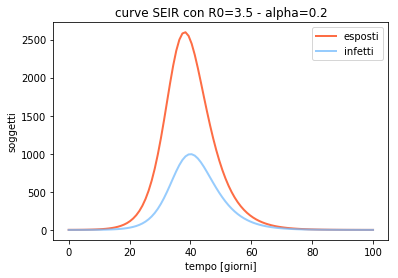

In [165]:
plt.plot(t, E, colors[3], alpha=0.75, lw=2, label='esposti')
plt.plot(t, I, colors[1], alpha=0.75, lw=2, label='infetti')
plt.xlabel('tempo [giorni]')
plt.ylabel('soggetti')
plt.legend()
plt.title(f'curve SEIR con R0={R0} - alpha={alpha}');

Il modello SEIR mostra un picco di contagiati intorno al quarantesimo giorno dall'inizio dell'esposizione, con un numero di infetti pari a circa 1000 (10% della popolazione).

## Il modello SEIR e il distanziamento sociale


Quando non si hanno ancora vaccini a disposizione, come accennato prima, ci sono altre misure profilattiche alle quali si può ricorrere per far fronte ad un'epidemia di questo tipo. Una di queste è quella del [**distanziamento sociale**](https://it.wikipedia.org/wiki/Distanziamento_sociale). In sostanza, con il distanziamento sociale si prova a diminuire la probabilità di contatto di persone portatrici del virus con individui non infetti, così da ridurre al minimo la trasmissione della malattia.

Andremo adesso ad introdurre un nuovo parametro nel nostro modello SEIR, per simulare un'azione preventiva di questo genere. Questo prametro, **ρ**, che chiameremo indice di distanziamento sociale andrà a modificare l'evoluzione di suscettibili ed esposti, e può avere un valore da 0 (in questo caso tutta la popolazione è in quarantena, completo *lock down*) ad 1 (nessun distanziamento sociale, torniamo al caso di prima). 

Le equazioni del modello diventano:

1. dS/dt = -ρβSI / N
2. dE/dt = ρβSI / N - αE
2. dI/dt = αE - γI
3. dR/dt = γI

In [204]:
rho_values = [1.0, 0.8, 0.5]

In [205]:
# periodo di incubazione: 5 giorni
alpha = 1 / 5.
# popolazione totale
N = 10000

# supponiamo una persona sia inizialmente esposta al contagio
E0 = 1
I0 = 0
R0 = 0
S0 = N - E0 - I0 - R0

In [206]:
# beta: tasso di infezione
beta = 1.75
# gamma: tasso medio di guarigione
gamma = 1./2

R0 = beta / gamma
print(f'R0 = {R0}')
# arco di tempo in giorni
t = np.linspace(0, 200, 200)

R0 = 3.5


In [207]:
y0 = S0, E0, I0, R0

In [208]:
results = {}

#risolviamo le eq diff e salviamo in dizionario
for rho in rho_values:
    S, E, I, R = md.resolve_SEIR_dist(y0, t, N, beta, gamma, alpha, rho)
    results[rho] = (S, E, I, R)

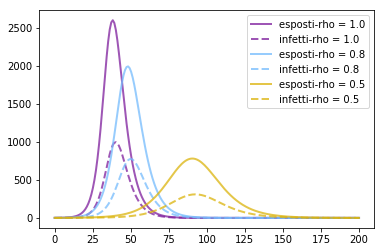

In [209]:
for index, (rho, (S, E, I, R)) in enumerate(results.items()):
    plt.plot(t, E, alpha=0.75, lw=2, color=colors[index], 
             label=f'esposti-rho = {rho}')
    plt.plot(t, I, alpha=0.75, lw=2, ls='--',
             color=colors[index], 
             label=f'infetti-rho = {rho}')
plt.legend()
plt.show()